In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()

#one-hot encoding
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.25,
                                                    random_state = 42)

#### Model & Tahmin

In [4]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [5]:
gbm_model

GradientBoostingRegressor()

In [6]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

352.0674526325749

#### Model Tuning

In [7]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
gbm_model

GradientBoostingRegressor()

In [19]:
?gbm_model

In [20]:
gbm_params = {"learning_rate": [0.1, 0.01, 0.001],
              "max_depth": [3,5,8],
              "n_estimators": [100, 200, 500],
              "subsample": [1, 0.5, 0.8],
              "loss": ["squared_error", "absolute_error", "quantile"]}

In [21]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [22]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
[CV] END learning_rate=0.1, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, loss=ls, max_depth=3, n_estimators=500, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, loss=ls, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, loss=ls, max_depth=5, n_estimators=200, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, loss=ls, max_depth=5, n_estimators=200, subsample=1; total time=   0.0s
[CV] END learning_rate=0.1, l

[CV] END learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=8, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=8, n_

[CV] END learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=lad, max_depth=8, n_estimators=500, subsample=1; total time=   0.0s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.001, loss=qua

[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=200, subsample=1; total time=   1.4s
[CV] END learning_rate=0.001, loss=quantile, max_depth=5, n_estimators=200, subsample=1; total time=   1.5s
[CV] END learn

[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=1; total time=   3.1s
[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5; total time=   2.7s
[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5; total time=   2.8s
[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5; total time=   2.3s
[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5; total time=   2.2s
[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5; total time=   2.1s
[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5; total time=   2.2s
[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5; total time=   2.4s
[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5; total time=   2.5s
[CV] END learning_rat

[CV] END learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=500, subsample=0.8; total time=   4.2s
[CV] END learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=500, subsample=0.8; total time=   4.0s
[CV] END learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=500, subsample=0.8; total time=   4.7s
[CV] END learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=500, subsample=0.8; total time=   4.2s
[CV] END learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=500, subsample=0.8; total time=   4.4s
[CV] END learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=500, subsample=0.8; total time=   4.5s
[CV] END learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=500, subsample=0.8; total time=   4.2s
[CV] END learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, loss=ls, max_depth=3, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, loss=ls, max_

[CV] END learning_rate=0.1, loss=squared_error, max_depth=5, n_estimators=500, subsample=1; total time=   1.5s
[CV] END learning_rate=0.1, loss=squared_error, max_depth=5, n_estimators=500, subsample=0.5; total time=   1.0s
[CV] END learning_rate=0.1, loss=squared_error, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.1, loss=squared_error, max_depth=8, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.1, loss=squared_error, max_depth=8, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, loss=squared_error, max_depth=8, n_estimators=200, subsample=1; total time=   1.0s
[CV] END learning_rate=0.1, loss=squared_error, max_depth=8, n_estimators=200, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.1, loss=squared_error, max_depth=8, n_estimators=500, subsample=1; total time=   1.6s
[CV] END learning_rate=0.1, loss=squared_error, max_depth=8, n_estimators=500, subsample=0.8; total ti

[CV] END learning_rate=0.1, loss=absolute_error, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.1, loss=absolute_error, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.1, loss=absolute_error, max_depth=5, n_estimators=200, subsample=0.5; total time=   1.3s
[CV] END learning_rate=0.1, loss=absolute_error, max_depth=5, n_estimators=200, subsample=0.5; total time=   1.2s
[CV] END learning_rate=0.1, loss=absolute_error, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.1, loss=absolute_error, max_depth=5, n_estimators=500, subsample=1; total time=   3.6s
[CV] END learning_rate=0.1, loss=absolute_error, max_depth=5, n_estimators=500, subsample=0.8; total time=   3.5s
[CV] END learning_rate=0.1, loss=absolute_error, max_depth=8, n_estimators=100, subsample=1; total time=   1.2s
[CV] END learning_rate=0.1, loss=absolute_error, max_depth=8, n_estimators=100, subsample=1;

[CV] END learning_rate=0.1, loss=absolute_error, max_depth=8, n_estimators=500, subsample=1; total time=   6.7s
[CV] END learning_rate=0.1, loss=absolute_error, max_depth=8, n_estimators=500, subsample=0.5; total time=   4.2s
[CV] END learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1; total time=   0.4s
[CV] END learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1; total time=   0.4s
[CV] END learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1; total time=   0.4s
[CV] END learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=1; total time=   0.4s
[CV] END learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.1, 

[CV] END learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.5; total time=   1.0s
[CV] END learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.5; total time=   1.0s
[CV] END learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=500, subsample=1; total time=   2.5s
[CV] END learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5; total time=   2.9s
[CV] END learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=500, subsample=0.8; total time=   3.0s
[CV] END learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.1, lo

[CV] END learning_rate=0.1, loss=absolute_error, max_depth=8, n_estimators=100, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.1, loss=absolute_error, max_depth=8, n_estimators=200, subsample=1; total time=   2.7s
[CV] END learning_rate=0.1, loss=absolute_error, max_depth=8, n_estimators=200, subsample=0.5; total time=   1.6s
[CV] END learning_rate=0.1, loss=absolute_error, max_depth=8, n_estimators=200, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.1, loss=absolute_error, max_depth=8, n_estimators=500, subsample=0.5; total time=   4.3s
[CV] END learning_rate=0.1, loss=absolute_error, max_depth=8, n_estimators=500, subsample=0.5; total time=   4.7s
[CV] END learning_rate=0.1, loss=absolute_error, max_depth=8, n_estimators=500, subsample=0.8; total time=   6.4s
[CV] END learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=500, subsample=1; total time=   1.8s
[CV] END learning_rate=0.1, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5; total tim

[CV] END learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=500, subsample=1; total time=   3.2s
[CV] END learning_rate=0.1, loss=quantile, max_depth=5, n_estimators=500, subsample=0.8; total time=   3.2s
[CV] END learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=1; total time=   0.8s
[CV] END learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.1, loss=quantile, max_depth=8, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.1, loss=q

[CV] END learning_rate=0.01, loss=squared_error, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=5, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=5, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=5, n_estimators=500, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=5, n_estimators=500, subsample=0.5; total time=   1.0s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=8, n_estimators=100, subsampl

[CV] END learning_rate=0.01, loss=absolute_error, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, loss=absolute_error, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, loss=absolute_error, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.01, loss=absolute_error, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.01, loss=absolute_error, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.01, loss=absolute_error, max_depth=3, n_estimators=500, subsample=0.5; total time=   1.7s
[CV] END learning_rate=0.01, loss=absolute_error, max_depth=3, n_estimators=500, subsample=0.5; total time=   1.8s
[CV] END learning_rate=0.01, loss=absolute_error, max_depth=5, n_estimators=100, subsample=1; total time=   0.8s
[CV] END learning_rate=0.01, loss=absolute_error, max_depth=5, n_estimators=100, s

[CV] END learning_rate=0.01, loss=absolute_error, max_depth=8, n_estimators=200, subsample=0.5; total time=   1.3s
[CV] END learning_rate=0.01, loss=absolute_error, max_depth=8, n_estimators=200, subsample=0.8; total time=   2.1s
[CV] END learning_rate=0.01, loss=absolute_error, max_depth=8, n_estimators=500, subsample=1; total time=   6.1s
[CV] END learning_rate=0.01, loss=absolute_error, max_depth=8, n_estimators=500, subsample=0.8; total time=   5.2s
[CV] END learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, loss=quantile, max_depth=3, n_estimators=200, subsample=1; total time=   0.8s

[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=0.5; total time=   0.9s
[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=1; total time=   2.7s
[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5; total time=   2.4s
[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.8; total time=   3.0s
[CV] END learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1; total time=   1.6s
[CV] END learning_rate=0.01

In [23]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'absolute_error',
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

In [24]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.1,
                                      loss = "absolute_error",
                                      max_depth=3,
                                      n_estimators=100,
                                      subsample=1).fit(X_train, y_train)

In [25]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

329.98158822397744

#### Değişken Önem Düzeyi

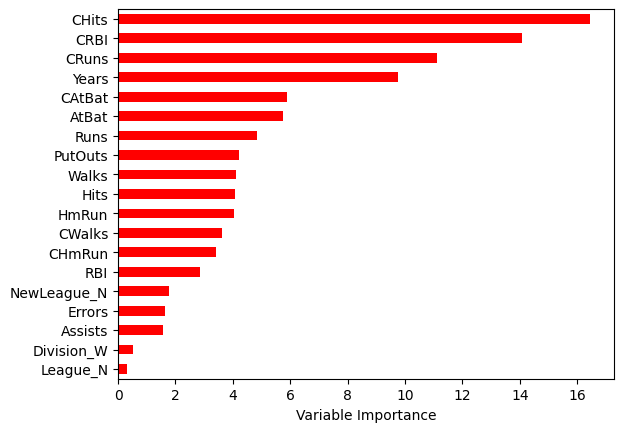

[CV] END learning_rate=0.001, loss=squared_error, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.001, loss=squared_error, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.001, loss=squared_error, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.001, loss=squared_error, max_depth=5, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.001, loss=squared_error, max_depth=5, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.001, loss=squared_error, max_depth=5, n_estimators=500, subsample=1; total time=   1.4s
[CV] END learning_rate=0.001, loss=squared_error, max_depth=5, n_estimators=500, subsample=0.5; total time=   1.0s
[CV] END learning_rate=0.001, loss=squared_error, max_depth=5, n_estimators=500, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.001, loss=squared_error, max_depth=8, n_estimators=100, subsamp

[CV] END learning_rate=0.001, loss=absolute_error, max_depth=8, n_estimators=500, subsample=0.8; total time=   4.1s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=200, subsample=1; total time=   0.9s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5; total time=   1.6s
[CV] END learning_rate=0.001, loss=quantile, max_depth=3, n_estimators=500, subsample=0.5; total time=   1.7s
[CV] E

[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5; total time=   2.4s
[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.7s
[CV] END learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=100, subsample=1; total time=   0.7s
[CV] END learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=100, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1; total time=   1.4s
[CV] END learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END learning_rate=

[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.5; total time=   2.2s
[CV] END learning_rate=0.01, loss=quantile, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.7s
[CV] END learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=1; total time=   1.4s
[CV] END learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=200, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=500, subsample=1; total time=   3.6s
[CV] END learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=500, subsample=0.5; total time=   2.3s
[CV] END learning_rate=0.01, loss=quantile, max_depth=8, n_estimators=500, subsample=0.8; total time=   3.2s
[CV] END learning_rate=0.001, loss=squared_error, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning

[CV] END learning_rate=0.001, loss=squared_error, max_depth=8, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.001, loss=squared_error, max_depth=8, n_estimators=200, subsample=1; total time=   0.8s
[CV] END learning_rate=0.001, loss=squared_error, max_depth=8, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.001, loss=squared_error, max_depth=8, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.001, loss=squared_error, max_depth=8, n_estimators=500, subsample=0.5; total time=   1.3s
[CV] END learning_rate=0.001, loss=squared_error, max_depth=8, n_estimators=500, subsample=0.5; total time=   1.3s
[CV] END learning_rate=0.001, loss=squared_error, max_depth=8, n_estimators=500, subsample=0.8; total time=   1.8s
[CV] END learning_rate=0.001, loss=absolute_error, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.001, loss=absolute_error, max_depth=3, n_estimators=100,

In [26]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                          index = X_train.columns)

Importance.sort_values(by = "Importance",
                           axis = 0,
                           ascending = True).plot(kind = "barh",
                                                  color = "r")

plt.xlabel("Variable Importance")
plt.gca().legend_ = None